# EDT(EXPLORATORY DATA ANALYSIS)- INDIVIDUAL PROJECT - AIRPLANE CRASHES

### Import needed libraries

In [64]:
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import cufflinks as cf
from IPython.display import display,HTML
import seaborn as sns

cf.set_config_file(sharing='public',theme='white',offline=True) # write cf.getThemes() to find all themes available

#### Loading dataset from ETL

In [69]:
df=pd.read_csv("Dataset_final/AccidentesAvionesETL.csv",index_col=0)

#### Dataset view

In [3]:
df

Date      Time                            Location  \
0     1908-09-17  17:18:00                 Fort Myer, Virginia   
1     1909-09-07       NaN             Juvisy-sur-Orge, France   
2     1912-07-12  06:30:00           Atlantic City, New Jersey   
3     1913-08-06       NaN  Victoria, British Columbia, Canada   
4     1913-09-09  18:30:00                  Over the North Sea   
...          ...       ...                                 ...   
5003  2021-03-28  18:35:00                  Near Butte, Alaska   
5004  2021-05-21  18:00:00                Near Kaduna, Nigeria   
5005  2021-06-10  08:00:00          Near Pyin Oo Lwin, Myanmar   
5006  2021-07-04  11:30:00          Patikul, Sulu, Philippines   
5007  2021-07-06  15:00:00                      Palana, Russia   

                             Operator flight_no                         Route  \
0                Military - U.S. Army       NaN                 Demonstration   
1                                 NaN       NaN                      Air show   
2                Military - U.S. Navy       NaN                   Test flight   
3                             Private       NaN                           NaN   
4              Military - German Navy       NaN                           NaN   
...                               ...       ...                           ...   
5003                Soloy Helicopters       NaN           Sightseeing Charter   
5004    Military - Nigerian Air Force       NaN                           NaN   
5005     Military - Myanmar Air Force       NaN          Naypyidaw - Anisakan   
5006  Military - Philippine Air Force       NaN  Cagayan de Oro-Lumbia - Jolo   
5007    Kamchatka Aviation Enterprise       251        Petropavlovsk - Palana   

                            Ac Type Registration   cn_ln  All Aboard  \
0                  Wright Flyer III          NaN       1         2.0   
1                    Wright Byplane          SC1     NaN         1.0   
2                         Dirigible          NaN     NaN         5.0   
3                  Curtiss seaplane          NaN     NaN         1.0   
4            Zeppelin L-1 (airship)          NaN     NaN        20.0   
...                             ...          ...     ...         ...   
5003    Eurocopter AS350B3 Ecureuil       N351SH    4598         6.0   
5004  Beechcraft B300 King Air 350i       NAF203  FL-891        11.0   
5005               Beechcraft 1900D         4610   E-325        14.0   
5006       Lockheed C-130H Hercules         5125    5125        96.0   
5007             Antonov An 26B-100     RA-26085   12310        28.0   

      Passengers Board  Crew Board  All Fatalities  Passenger Fatalities  \
0                  1.0         1.0             1.0                   1.0   
1                  0.0         1.0             1.0                   0.0   
2                  0.0         5.0             5.0                   0.0   
3                  0.0         1.0             1.0                   0.0   
4                  NaN         NaN            14.0                   NaN   
...                ...         ...             ...                   ...   
5003               5.0         1.0             5.0                   4.0   
5004               7.0         4.0            11.0                   7.0   
5005              12.0         2.0            12.0                  11.0   
5006              88.0         8.0            50.0                   NaN   
5007              22.0         6.0            28.0                  22.0   

      Crew fatalities  Ground  \
0                 0.0     0.0   
1                 0.0     0.0   
2                 5.0     0.0   
3                 1.0     0.0   
4                 NaN     0.0   
...               ...     ...   
5003              1.0     0.0   
5004              4.0     0.0   
5005              1.0     0.0   
5006              NaN     3.0   
5007              6.0     0.0   

                                                Summary  \
0     During

#### Non-null count

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5008 entries, 0 to 5007
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  5008 non-null   object 
 1   Time                  3504 non-null   object 
 2   Location              5003 non-null   object 
 3   Operator              4998 non-null   object 
 4   flight_no             1326 non-null   object 
 5   Route                 4246 non-null   object 
 6   Ac Type               4995 non-null   object 
 7   Registration          4736 non-null   object 
 8   cn_ln                 4341 non-null   object 
 9   All Aboard            4991 non-null   float64
 10  Passengers Board      4787 non-null   float64
 11  Crew Board            4789 non-null   float64
 12  All Fatalities        5000 non-null   float64
 13  Passenger Fatalities  4773 non-null   float64
 14  Crew fatalities       4773 non-null   float64
 15  Ground               

<AxesSubplot: >

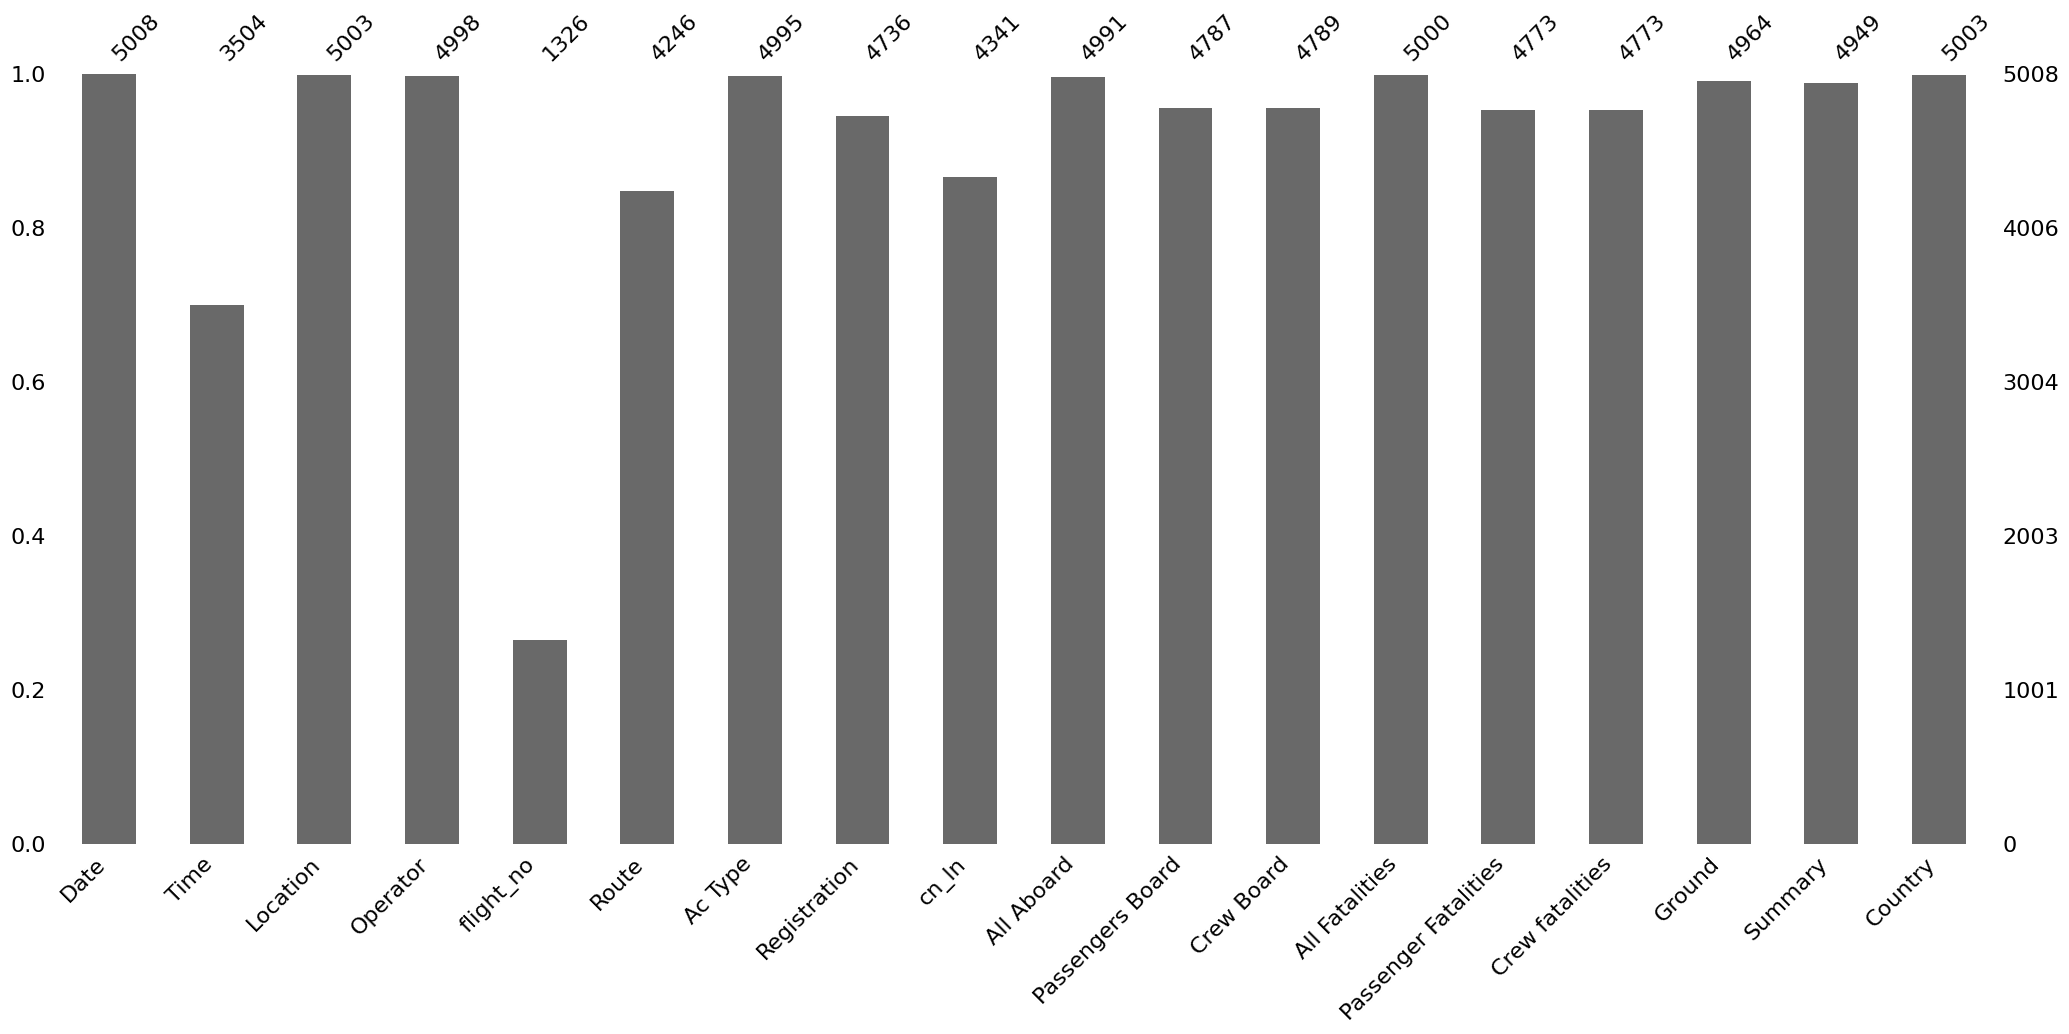

In [5]:
msno.bar(df)


#### Null count

In [6]:
df.isna().sum()


Date                       0
Time                    1504
Location                   5
Operator                  10
flight_no               3682
Route                    762
Ac Type                   13
Registration             272
cn_ln                    667
All Aboard                17
Passengers Board         221
Crew Board               219
All Fatalities             8
Passenger Fatalities     235
Crew fatalities          235
Ground                    44
Summary                   59
Country                    5
dtype: int64

<AxesSubplot: >

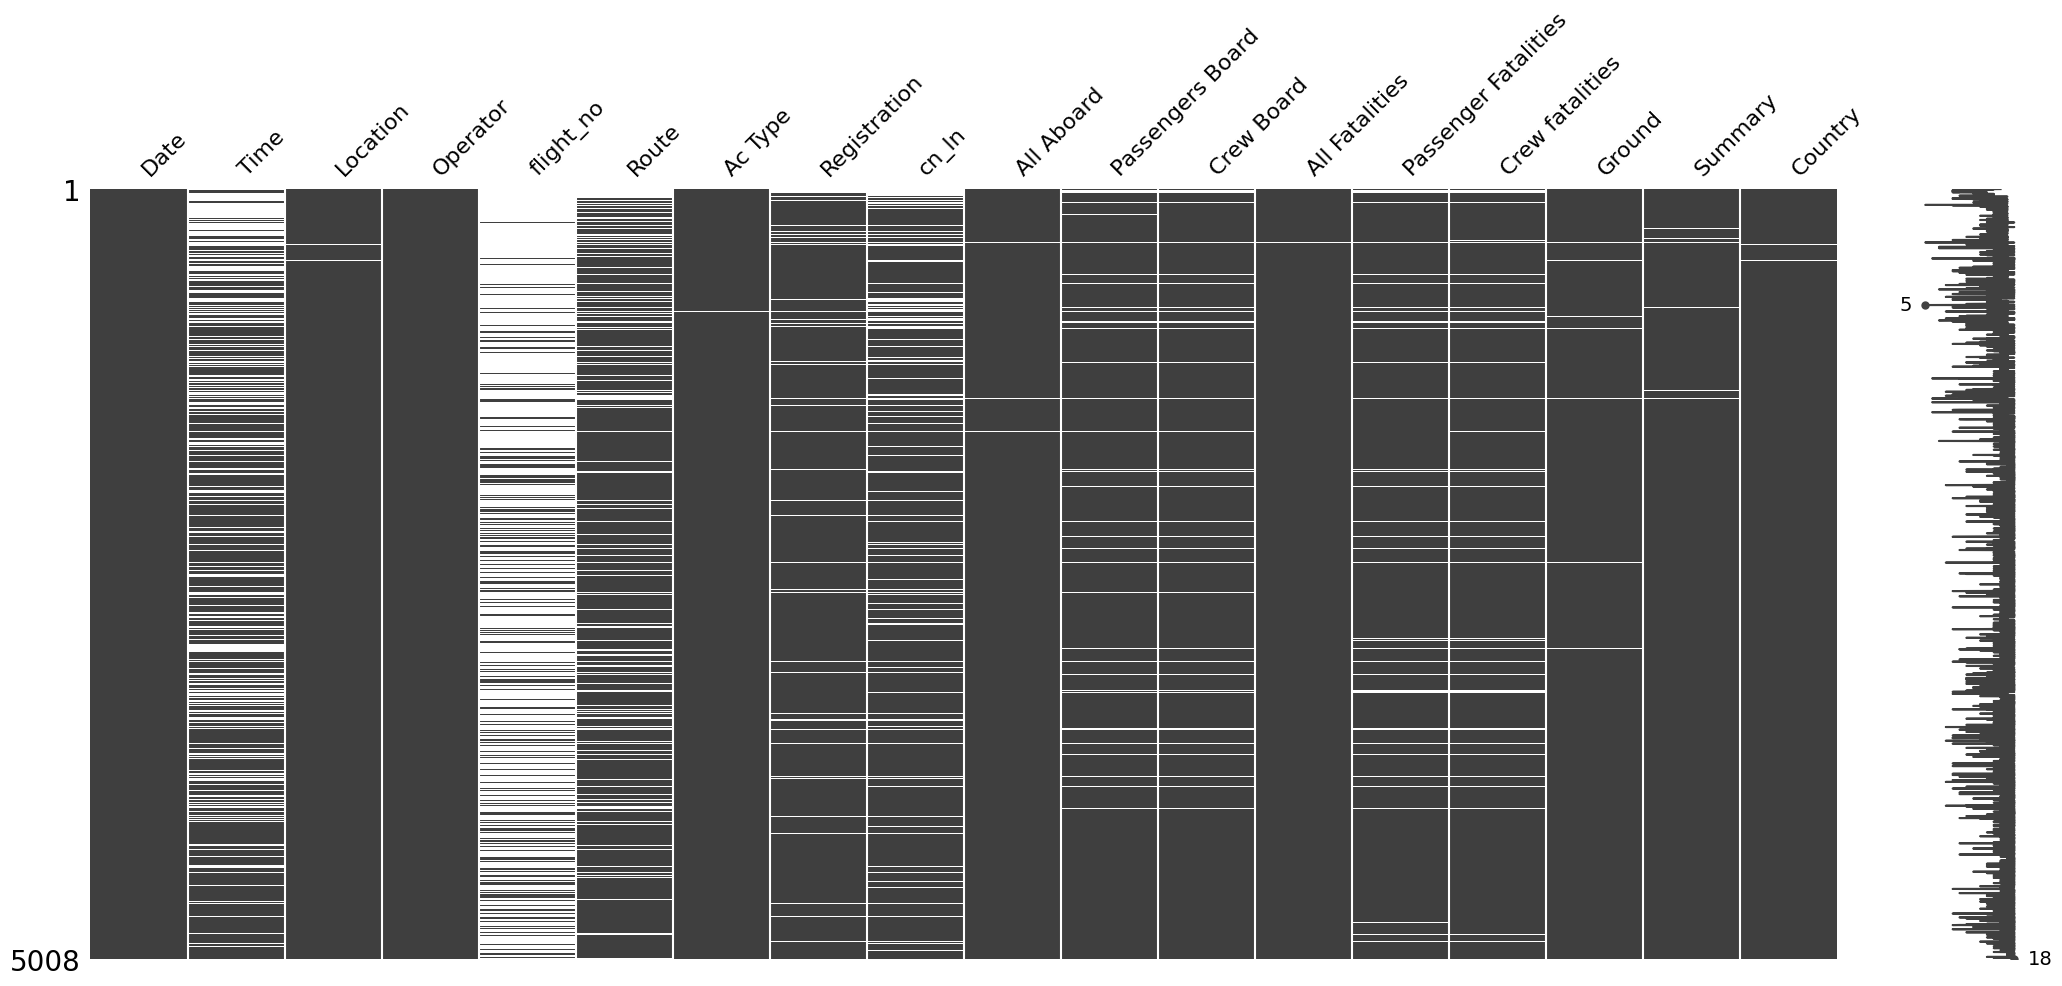

In [7]:
msno.matrix(df)


#### Setting format in Columns with dates

In [8]:
df['Hour'] = pd.to_datetime(df['Time'], errors="coerce").dt.hour
df['Time'] = pd.to_datetime(df.Time, errors='coerce',format='%H:%M:%S').dt.time
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [42]:
profile = ProfileReport(df, title='Pandas Profiling Report',
                        explorative=True)  # Making a report
profile.to_file("output.html")  # Exporting the report to a file
profile  # Display the report


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### Column Analysis

##### Number of accidents by hour

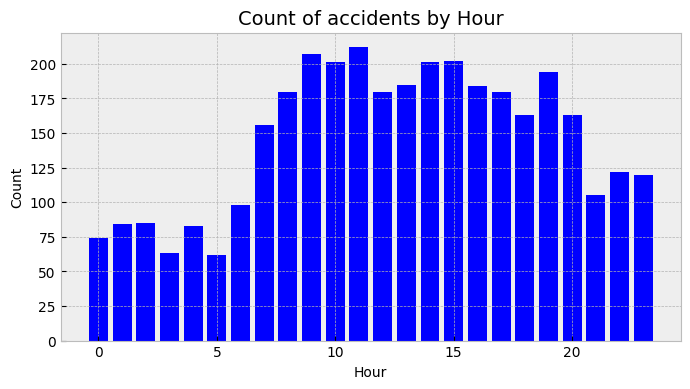

In [9]:
mex4=pd.DataFrame(df.Hour.value_counts())
mex4.reset_index(inplace=True)
mex4 = mex4.sort_values(by='index', ascending=True)

plt.figure(figsize=(8, 4))
plt.style.use('bmh')
plt.bar(mex4["index"], mex4["Hour"], color='blue', linewidth=1)
plt.xlabel('Hour', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Hour', loc='Center', fontsize=14)
plt.show()


In [19]:
100*mex4.Hour.max()/mex4.Hour.sum()


6.050228310502283

This figure shows that there is no definite pattern, but the number of crashes tends to be a little lower during the night and early morning,  the most of accidents occurred in the range of 8 to 20 hour of the day and the highest at 11.

##### Number of accidents by year

In [36]:
df["Year"]=df["Date"].dt.year
mex = pd.DataFrame(df.Year.value_counts())
mex.reset_index(inplace=True)
mex = mex.sort_values(by='index', ascending=True)
mex.set_index("index",inplace=True)

mex.iplot(kind='line', xTitle='Years', yTitle='Accidents',
          title='Crashes (1908-2021)')


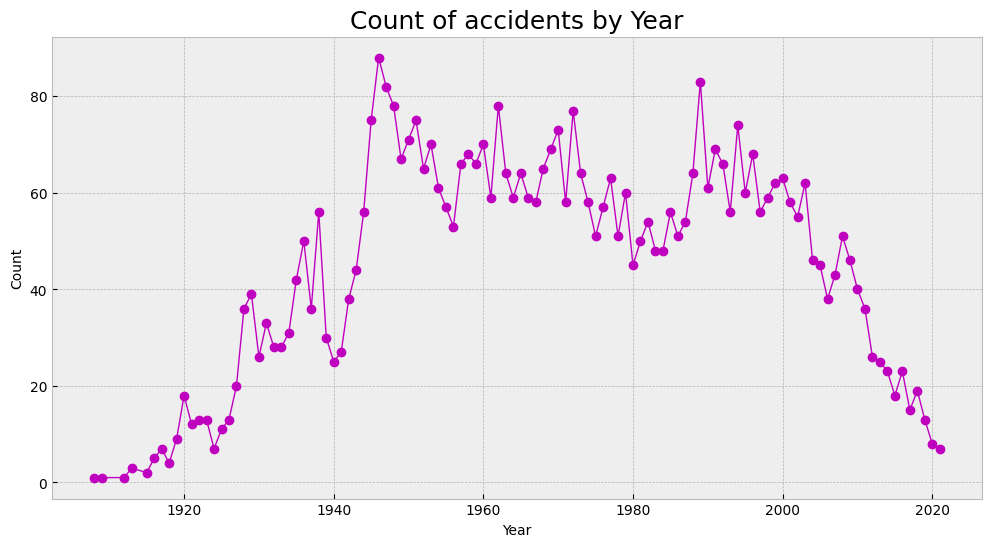

In [33]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
Temp = df.groupby(df.Date.dt.year)[['Date']].count()
Temp = Temp.rename(columns={"Date": "Count"})

plt.figure(figsize=(12, 6))
plt.style.use('bmh')
plt.plot(Temp.index, Temp['Count'], color='m', marker="o", linewidth=1)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Year', loc='Center', fontsize=18)
plt.show()


In [34]:
100*Temp['Count'].max()/Temp['Count'].sum()

1.7571884984025559

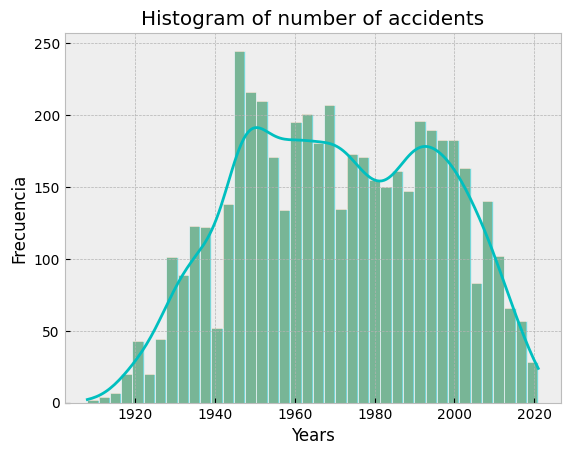

In [199]:
plt.hist(data=df,x="Year", bins=40, color='#F2AB6D', rwidth=0.85)
sns.histplot(data=df, x='Year', bins=40, color='c', kde=True)
plt.title('Histogram of number of accidents')
plt.xlabel('Years')
plt.ylabel('Frecuencia')
plt.show()


This figure shows that there is no definite pattern, but the number of crashes tends to be a little lower during first years and last years, the most of accidents occurred in the range of 1944 to 2003 and the highest in 1946 and 1989.

##### Number of accidents by month

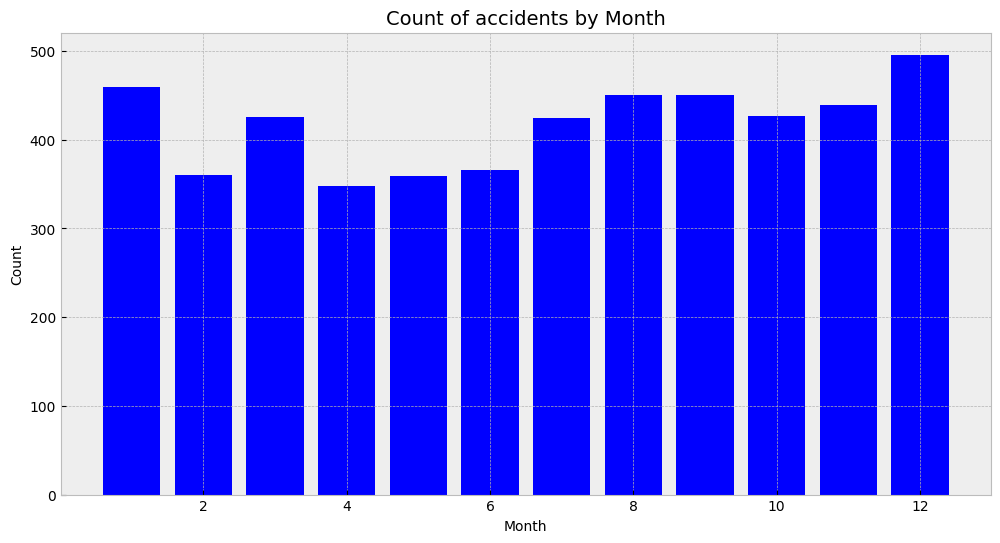

In [20]:
df["Month"]=df["Date"].dt.month
mex1=pd.DataFrame(df.Month.value_counts())
mex1.reset_index(inplace=True)
mex1 = mex1.sort_values(by='Month', ascending=True)

plt.figure(figsize=(12, 6))
plt.style.use('bmh')
plt.bar( mex1["index"],mex1["Month"], color='blue', linewidth=1)
plt.xlabel('Month', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Month', loc='Center', fontsize=14)
plt.show()


In [21]:
100*mex1.Month.max()/mex1.Month.sum()


9.904153354632587

This figure shows that there is no definite pattern, but the number of crashes tends to be a little higher during around months of new years eve and christmas, the most of accidents occurred in the range of December to January and the highest in December.

##### Number of accidents by day of week

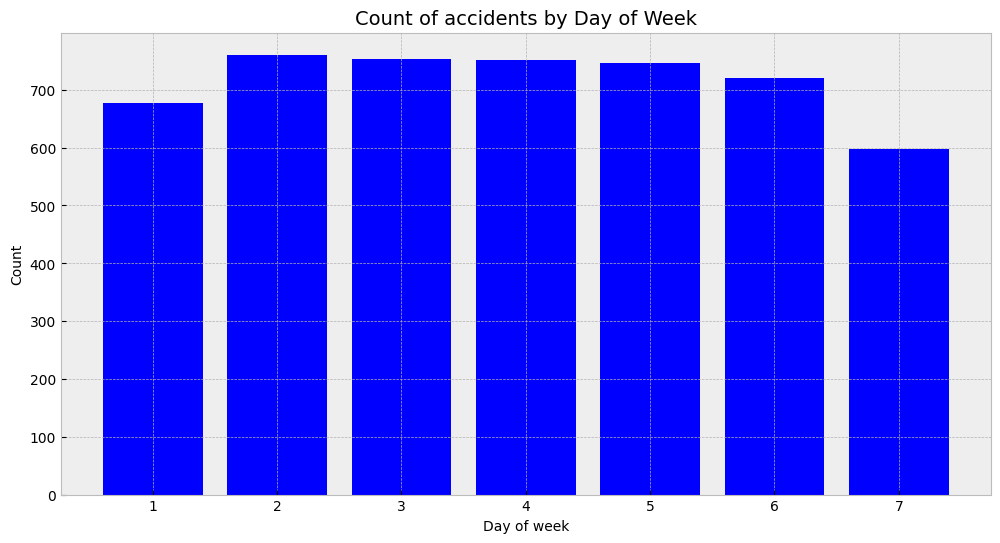

In [24]:
df["Day"]=df["Date"].dt.dayofweek
mex2 = pd.DataFrame(df.Day.value_counts())
mex2.reset_index(inplace=True)
mex2 = mex2.sort_values(by='Day', ascending=True)

plt.figure(figsize=(12, 6))
plt.style.use('bmh')
plt.bar(mex2["index"]+1, mex2["Day"], color='blue', linewidth=1)
plt.xlabel('Day of week', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Day of Week', loc='Center', fontsize=14)
plt.show()


In [25]:
100*mex2.Day.max()/mex2.Day.sum()

15.195686900958467

This figure shows that there is definite pattern, the number of crashes tends to be a little lower during Sunday and Monday, the most of accidents occurred in the range of Tuesday to Saturday and the highest on Tuesday.

##### Number of accidents by day of week of month

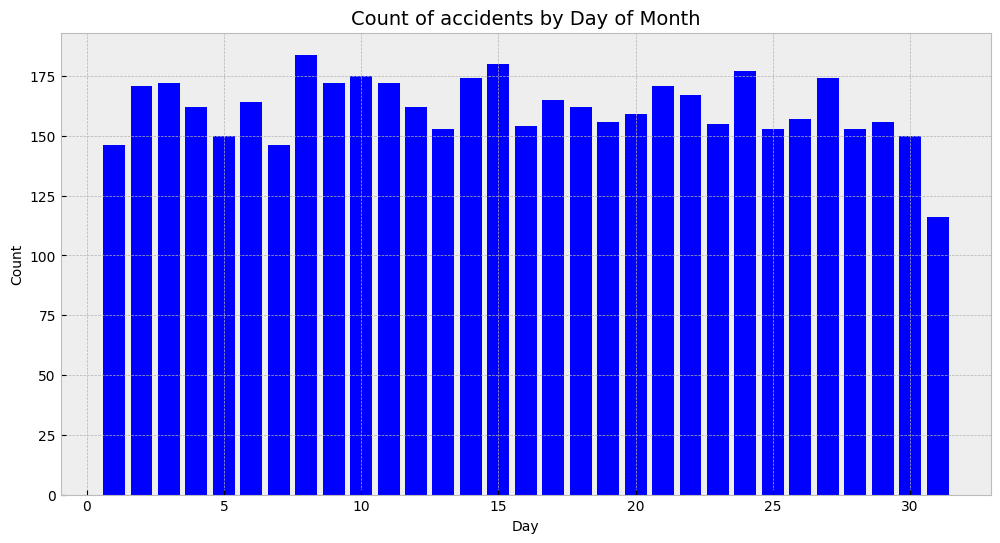

In [29]:
df["DayOf"]=df["Date"].dt.day
mex5 = pd.DataFrame(df.DayOf.value_counts())
mex5.reset_index(inplace=True)
##mex2 = mex2.sort_values(by='DayOf', ascending=True)

plt.figure(figsize=(12, 6))
plt.style.use('bmh')
plt.bar(mex5["index"], mex5["DayOf"], color='blue', linewidth=1)
plt.xlabel('Day', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Day of Month', loc='Center', fontsize=14)
plt.show()

In [30]:
100*mex5["DayOf"].max()/mex5["DayOf"].sum()


3.6741214057507987

This figure shows that there is no definite pattern, the highest in 8th day of month and the lowest in 31th but this could being happened due to most of months doesn't have day 31.

#### Number of accidents by Country

Text(0, 0.5, 'Country')

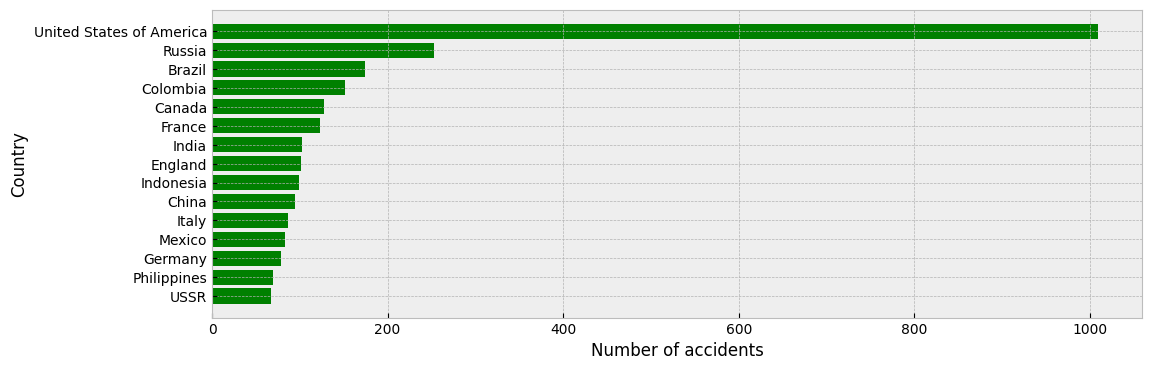

In [62]:
mex6 = pd.DataFrame(df.Country.value_counts())
mex6.reset_index(inplace=True)
popular = mex6.sort_values("Country", ascending=False)  # PLOT
plt.figure(figsize=(12, 4))
plt.barh(popular["index"].head(15), popular.Country.head(
    15), align='center', color="green")
plt.gca().invert_yaxis()
plt.xlabel("Number of accidents")
plt.ylabel("Country")


In [43]:
100*mex6.Country.max()/mex6.Country.sum()

20.167899260443733

This figure shows that the most airplane crashes ocurred in The United States of America with more than 1000.

#### Number of accidents by Location

Text(0, 0.5, 'Location')

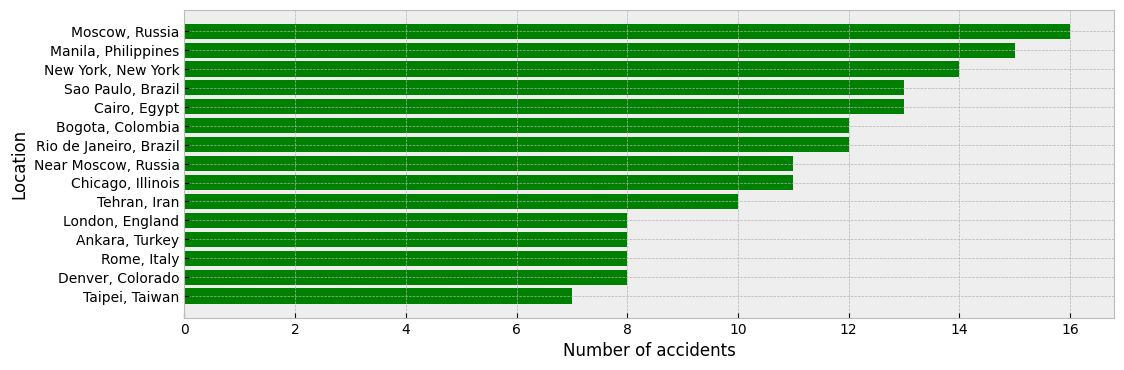

In [60]:
mex7 = pd.DataFrame(df.Location.value_counts())
mex7.reset_index(inplace=True)
popular = mex7.sort_values("Location", ascending=False)  # PLOT
plt.figure(figsize=(12, 4))
plt.barh(popular["index"].head(15), popular.Location.head(15), align='center', color="green")
plt.gca().invert_yaxis()
plt.xlabel("Number of accidents")
plt.ylabel("Location")


This figure shows that the most airplane crashes ocurred in a specif Location was in Moscow, Russia with more than 15 followed by Manila, Philippines and New York.

#### Number of accidents by Operators

Text(0, 0.5, 'Operator')

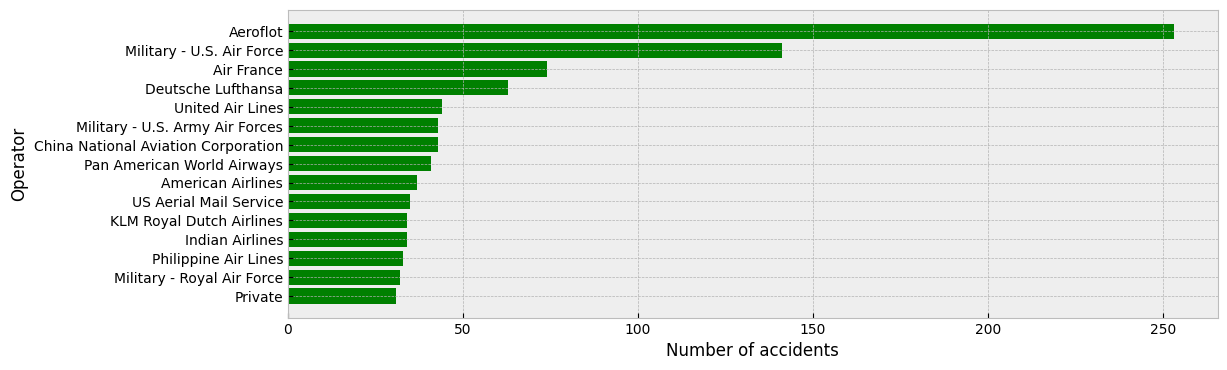

In [52]:
mex8 = pd.DataFrame(df.Operator.value_counts())
mex8.reset_index(inplace=True)
popular = mex8.sort_values("Operator", ascending=False)  # PLOT
plt.figure(figsize=(12, 4))
plt.barh(popular["index"].head(15), popular.Operator.head(15), align='center', color="green")
plt.gca().invert_yaxis()
plt.xlabel("Number of accidents")
plt.ylabel("Operator")

In [53]:
100*mex8.Operator.max()/mex8.Operator.sum()

5.06202480992397

This figure shows that the most airplane crashes ocurred by Operator Aeroflot which is an Russian Airline, it would explain why Location Moscow,Russia has the most accidents and also shows that many U.S.A operators has a lot of accidents as well this would explain why U.S.A is the country with most airplane crashes.

Text(0, 0.5, 'Airplane Type')

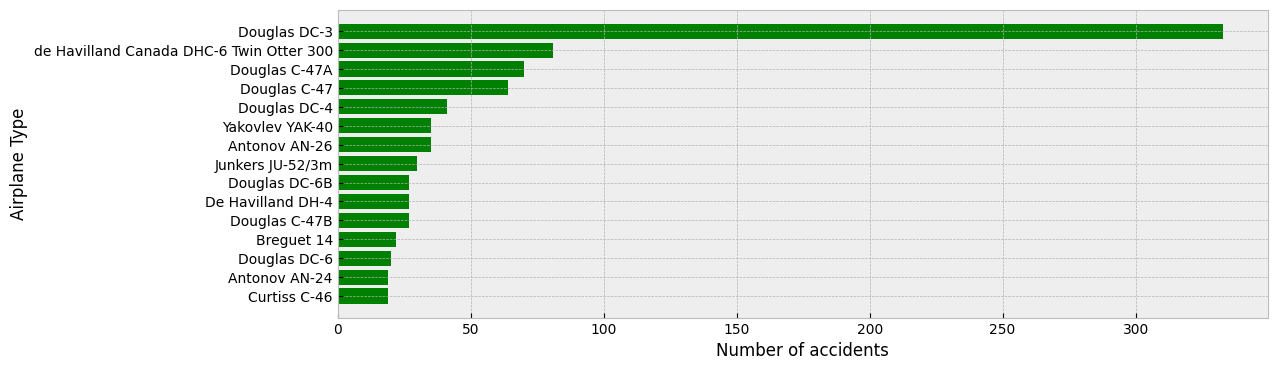

In [51]:
mex9 = pd.DataFrame(df["Ac Type"].value_counts())
mex9.reset_index(inplace=True)
popular = mex9.sort_values("Ac Type", ascending=False)  # PLOT
plt.figure(figsize=(12, 4))
plt.barh(popular["index"].head(15), popular["Ac Type"].head(15), align='center', color="green")
plt.gca().invert_yaxis()
plt.xlabel("Number of accidents")
plt.ylabel("Airplane Type")

This figure shows that the most airplane which crashed were Type Douglas DC-3,C-47A, C-47, DC-4 and others.

#### Number of airplane fatalities and ground fatalities by Year

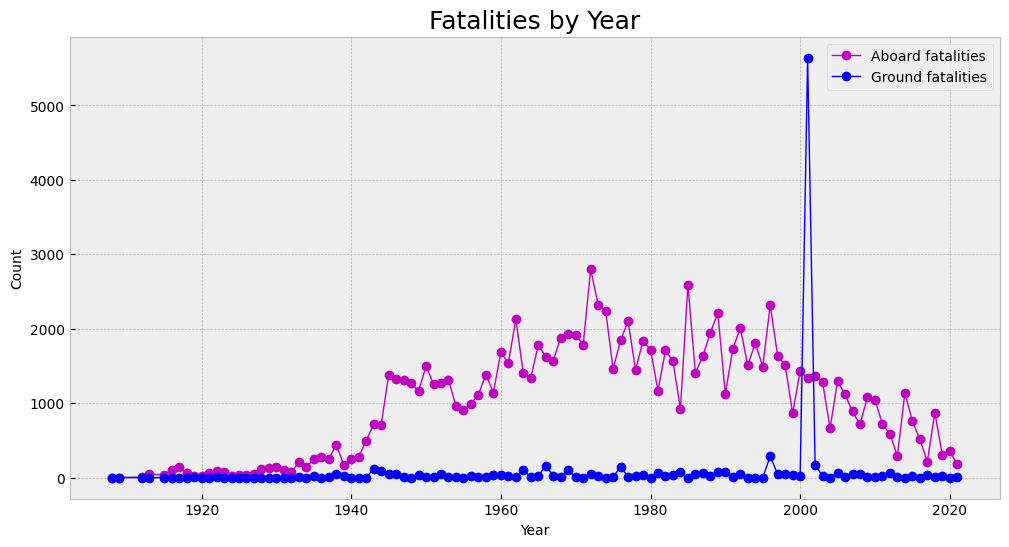

In [216]:
All_fat=df.groupby(by=["Year"])["All Fatalities"].sum().reset_index()
All_ground=df.groupby(by=["Year"])["Ground"].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.style.use('bmh')
plt.plot(All_fat['Year'], All_fat['All Fatalities'],
         color='m', marker="o", linewidth=1,label="Aboard fatalities")
plt.plot(All_ground['Year'], All_ground['Ground'],
         color='b', marker="o", linewidth=1,label="Ground fatalities")
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Fatalities by Year', loc='Center', fontsize=18)
plt.legend()
plt.show()


This figure shows that there is a definite pattern in ground fatalities except in 2001 with more than 5000 victims cause the attacks on the Twin Towers, aswell that there is no definite pattern in Aboard fatalities, but the number of fatalities tends to be a little lower during first years and last years, the most of fatalities occurred in the range of 1944 to 2003 and the highest in 1972 and 1985.

#### Number of airplane fatalities and ground fatalities by Month


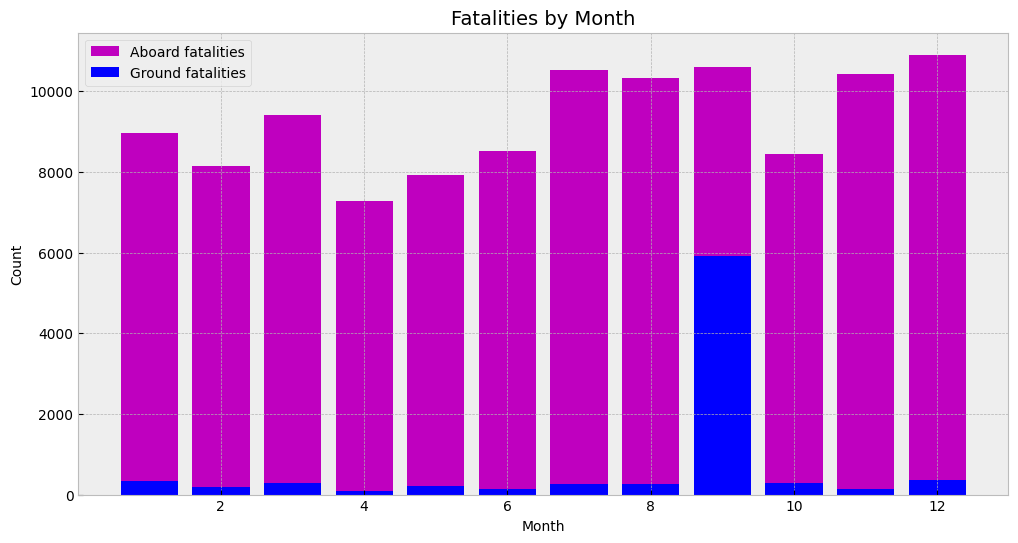

In [22]:
All_fat = df.groupby(by=["Month"])["All Fatalities"].sum().reset_index()
All_ground = df.groupby(by=["Month"])["Ground"].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.style.use('bmh')
plt.bar(All_fat['Month'], All_fat['All Fatalities'],
         color='m', linewidth=1,label="Aboard fatalities")
plt.bar(All_ground['Month'], All_ground['Ground'],
         color='b',  linewidth=1,label="Ground fatalities")
plt.xlabel('Month', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Fatalities by Month', loc='Center', fontsize=14)
plt.legend()
plt.show()

In [23]:
100*All_fat['All Fatalities'].max()/All_fat['All Fatalities'].sum()


9.783798331389612

This figure shows that there is a definite pattern in ground fatalities except in September cause the attacks on the Twin Towers, aswell that there is no definite pattern in Aboard fatalities, but the number of fatalities tends to be a little lower during April, May and June, the most of fatalities occurred in the range of July to December and the highest in December.

#### Number of airplane fatalities and ground fatalities by day of week


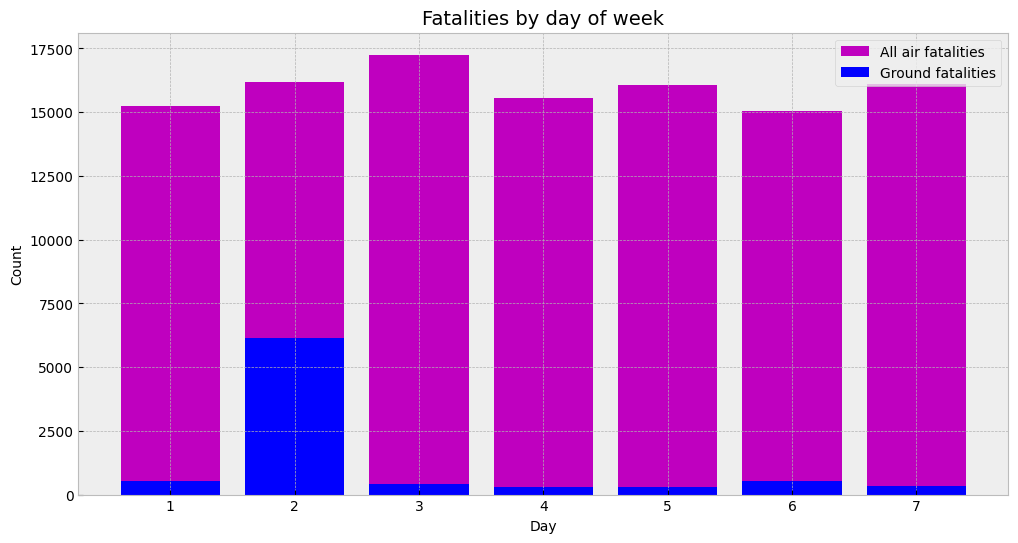

In [26]:
All_fat = df.groupby(by=["Day"])["All Fatalities"].sum().reset_index()
All_ground = df.groupby(by=["Day"])["Ground"].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.style.use('bmh')
plt.bar(All_fat['Day']+1, All_fat['All Fatalities'],
        color='m', linewidth=1, label="All air fatalities")
plt.bar(All_ground['Day']+1, All_ground['Ground'],
        color='b',  linewidth=1, label="Ground fatalities")
plt.xlabel('Day', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Fatalities by day of week', loc='Center', fontsize=14)
plt.legend()
plt.show()


In [27]:
100*All_fat['All Fatalities'].max()/All_fat['All Fatalities'].sum()

15.480398313447564

This figure shows that there is a definite pattern in ground fatalities except on Tuesday cause the attacks on the Twin Towers, aswell that there is no definite pattern in Aboard fatalities, but the number of fatalities tends to be a little lower during Saturday, the most of fatalities occurred in the range of Tuesday to Wednesday and the highest on Wednesday.

#### Number of airplane fatalities and ground fatalities by day of month

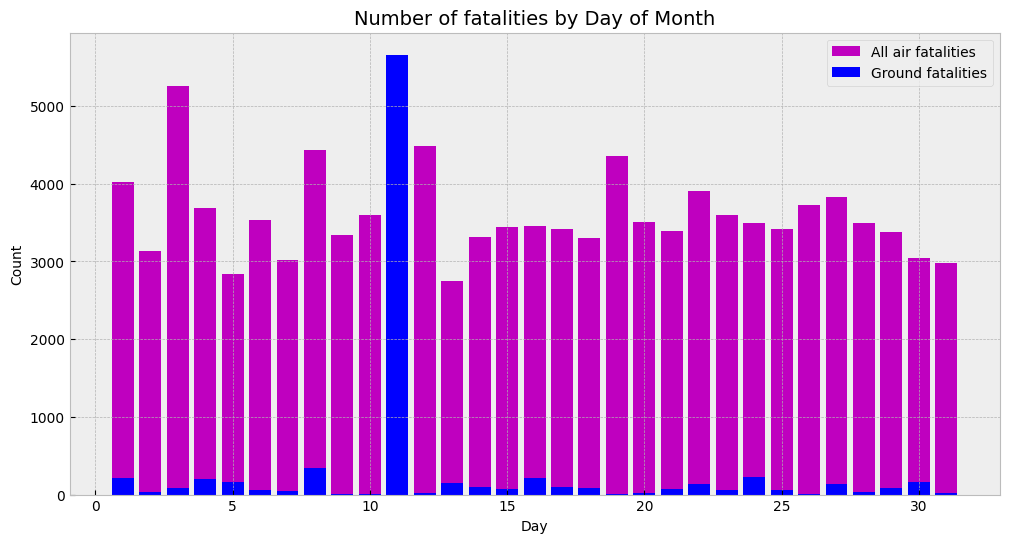

In [31]:
All_fat = df.groupby(by=["DayOf"])["All Fatalities"].sum().reset_index()
All_ground = df.groupby(by=["DayOf"])["Ground"].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.style.use('bmh')

plt.bar(All_fat['DayOf'], All_fat['All Fatalities'],
        color='m', linewidth=1, label="All air fatalities")
plt.bar(All_ground['DayOf'], All_ground['Ground'],
        color='b',  linewidth=1, label="Ground fatalities")

plt.xlabel('Day', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Number of fatalities by Day of Month', loc='Center', fontsize=14)
plt.legend()
plt.show()


In [32]:
100*All_fat['All Fatalities'].max()/All_fat['All Fatalities'].sum()

4.7151700008971025

This figure shows that there is a definite pattern in ground fatalities except on 11th cause the attacks on the Twin Towers, aswell that there is no definite pattern in Aboard fatalities, but the number of fatalities tends to be a little lower during last days of month, the most of fatalities occurred on 3rd day of month.

#### Number of airplane fatalities and ground fatalities by Hour

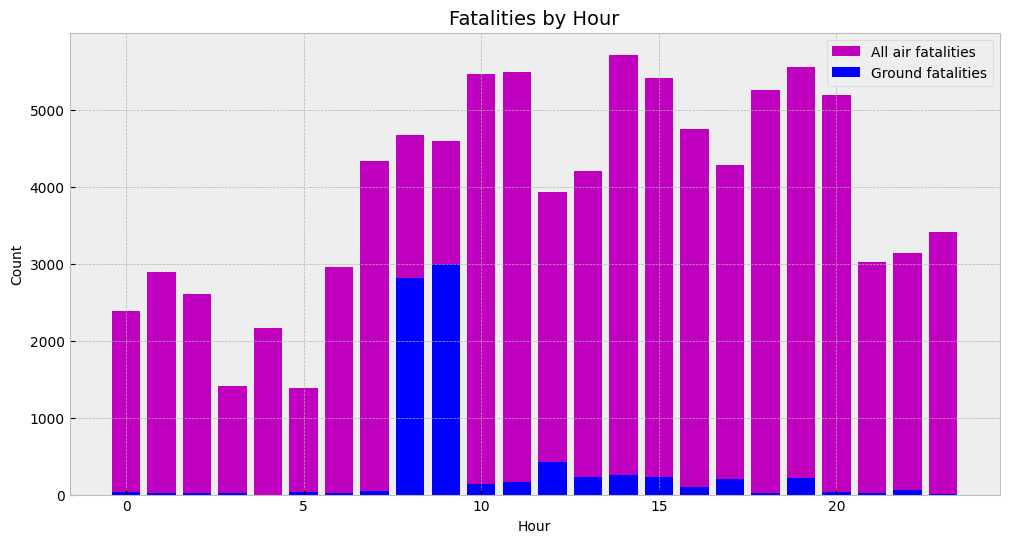

In [13]:
All_fat = df.groupby(by=["Hour"])["All Fatalities"].sum().reset_index()
All_ground = df.groupby(by=["Hour"])["Ground"].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.style.use('bmh')

plt.bar(All_fat['Hour'], All_fat['All Fatalities'],
        color='m', linewidth=1, label="All air fatalities")
plt.bar(All_ground['Hour'], All_ground['Ground'],
        color='b',  linewidth=1, label="Ground fatalities")

plt.xlabel('Hour', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Fatalities by Hour', loc='Center', fontsize=14)
plt.legend()
plt.show()


In [17]:
100*All_fat["All Fatalities"].max()/All_fat["All Fatalities"].sum()


6.066525815116415

This figure shows that there is a definite pattern in ground fatalities except at 8 and 9 o'clock cause the attacks on the Twin Towers, aswell that there is no definite pattern in Aboard fatalities, but the number of fatalities tends to be a little lower during early morning and night, the most of fatalities occurred during the midday.

#### Number of airplane fatalities and ground fatalities by Location

Text(0, 0.5, 'Location')

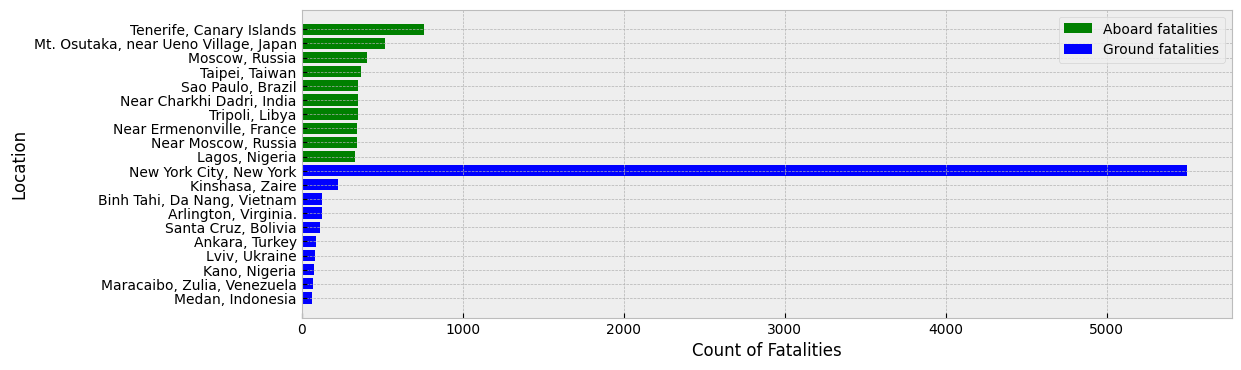

In [212]:
All_fat = df.groupby(by=["Location"])["All Fatalities"].sum().reset_index()
All_fat=All_fat.sort_values(by=["All Fatalities"], ascending=False).head(10)
All_ground = df.groupby(by=["Location"])["Ground"].sum().reset_index()
All_ground = All_ground.sort_values(by=["Ground"], ascending=False).head(10)
plt.figure(figsize=(12, 4))
plt.barh(All_fat["Location"], All_fat["All Fatalities"],
        align='center', color="green", label="Aboard fatalities")
plt.barh(All_ground["Location"], All_ground["Ground"],
         align='center', color="blue",label="Ground fatalities")
plt.legend()
plt.gca().invert_yaxis()
plt.xlabel("Count of Fatalities")
plt.ylabel("Location")


#### Number of airplane fatalities and ground fatalities by Country

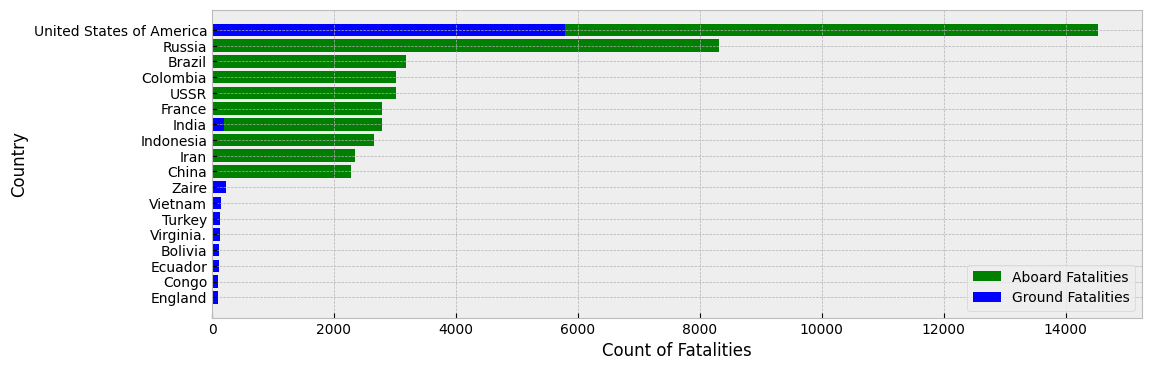

In [48]:
All_fat1 = df.groupby(by=["Country"])["All Fatalities"].sum().reset_index()
All_fat = All_fat1.sort_values(by=["All Fatalities"], ascending=False).head(10)
All_ground1 = df.groupby(by=["Country"])["Ground"].sum().reset_index()
All_ground = All_ground1.sort_values(by=["Ground"], ascending=False).head(10)
plt.figure(figsize=(12, 4))
plt.barh(All_fat["Country"], All_fat["All Fatalities"].head(10),
         align='center', color="green",label="Aboard Fatalities")
plt.barh(All_ground["Country"], All_ground["Ground"].head(10),
         align='center', color="blue",label="Ground Fatalities")
plt.gca().invert_yaxis()
plt.xlabel("Count of Fatalities")
plt.ylabel("Country")
plt.legend(loc="lower right")


In [50]:
100*All_fat1["All Fatalities"].max()/All_fat1["All Fatalities"].sum()


13.03399822337075

This figure shows that the most airplane fatalities and ground fatalities ocurred in The United States of America, this would explain the most number of accidentes there, following by Russia, Brasil with many airplane fatalities but less ground fatalities.

#### Number of airplane fatalities and ground fatalities by Operator

Text(0, 0.5, 'Location')

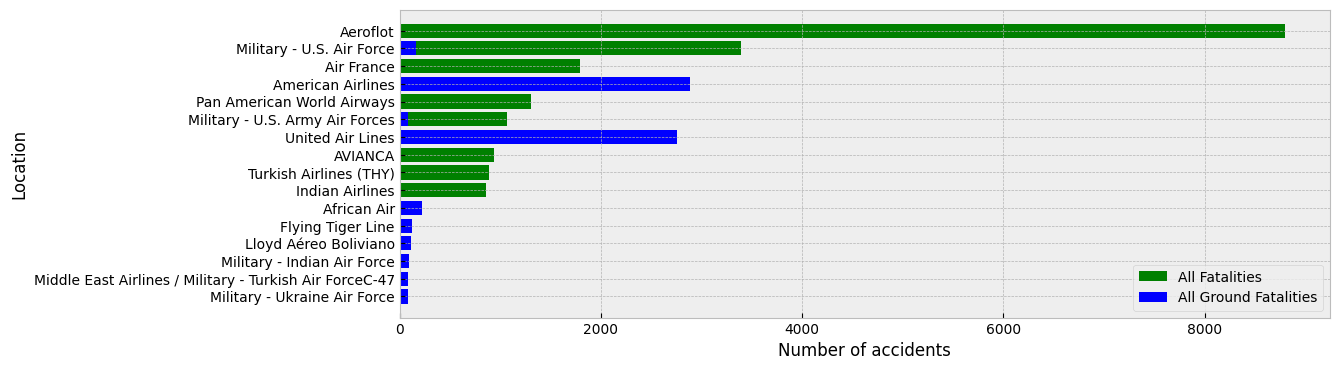

In [54]:
All_fat1 = df.groupby(by=["Operator"])["All Fatalities"].sum().reset_index()
All_fat = All_fat1.sort_values(by=["All Fatalities"], ascending=False).head(10)
All_ground1 = df.groupby(by=["Operator"])["Ground"].sum().reset_index()
All_ground = All_ground1.sort_values(by=["Ground"], ascending=False).head(10)
plt.figure(figsize=(12, 4))
plt.barh(All_fat["Operator"], All_fat["All Fatalities"],
         align='center', color="green",label="All Fatalities")
plt.barh(All_ground["Operator"], All_ground["Ground"],
         align='center', color="blue",label="All Ground Fatalities")
plt.gca().invert_yaxis()
plt.xlabel("Number of accidents")
plt.legend()
plt.ylabel("Location")

In [56]:
100*All_fat1["All Fatalities"].max()/All_fat1["All Fatalities"].sum()

7.902391725921138

This figure shows that the most airplane fatalities ocurred by Aeroflot operator, this would explain the most number of accidentes by this, following by U.S.A operator, with many airplane fatalities and ground fatalities.

#### Number of airplane fatalities and ground fatalities by Airplane Type

Text(0, 0.5, 'Airplane type')

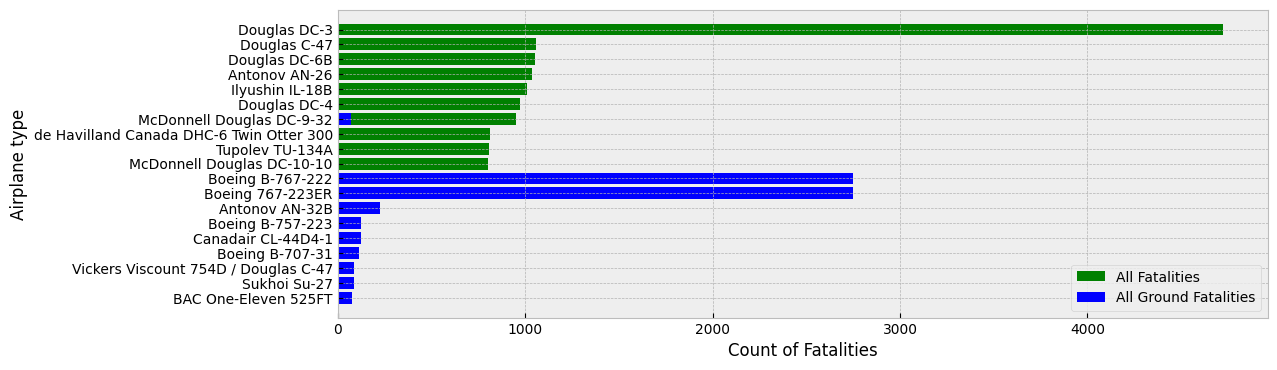

In [213]:
All_fat = df.groupby(by=["Ac Type"])["All Fatalities"].sum().reset_index()
All_fat = All_fat.sort_values(by=["All Fatalities"], ascending=False).head(10)
All_ground = df.groupby(by=["Ac Type"])["Ground"].sum().reset_index()
All_ground = All_ground.sort_values(by=["Ground"], ascending=False).head(10)
plt.figure(figsize=(12, 4))
plt.barh(All_fat["Ac Type"], All_fat["All Fatalities"],
         align='center', color="green", label="All Fatalities")
plt.barh(All_ground["Ac Type"], All_ground["Ground"],
         align='center', color="blue", label="All Ground Fatalities")
plt.gca().invert_yaxis()
plt.xlabel("Count of Fatalities")
plt.legend()
plt.ylabel("Airplane type")


This figure shows that the most airplane fatalities ocurred by Douglas model, this would explain the most number of accidentes by this.

#### All aboard and all fatalities by Year

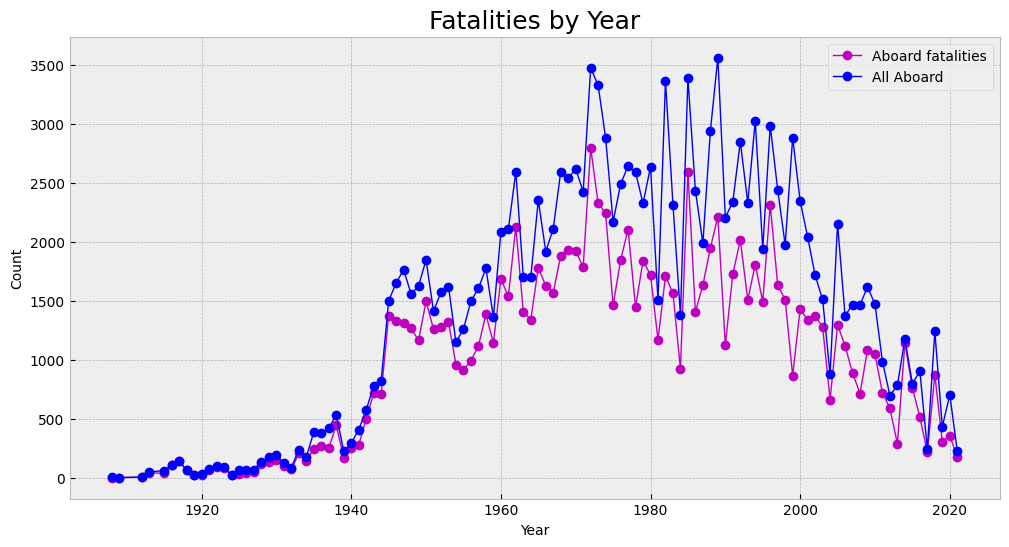

In [37]:
All_fat = df.groupby(by=["Year"])["All Fatalities"].sum().reset_index()
All_ground = df.groupby(by=["Year"])["All Aboard"].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.style.use('bmh')
plt.plot(All_fat['Year'], All_fat['All Fatalities'],
         color='m', marker="o", linewidth=1, label="Aboard fatalities")
plt.plot(All_ground['Year'], All_ground['All Aboard'],
         color='b', marker="o", linewidth=1, label="All Aboard")
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Fatalities by Year', loc='Center', fontsize=18)
plt.legend()
plt.show()


In [38]:
100*All_fat['All Fatalities'].max()/All_fat['All Fatalities'].sum()


2.5082981968242577

The figure shows that in the first years the number of people on board and the total number of deaths were similar, this trend changed later where a greater number of survivors can be observed.

#### Lineal correlation coefficient between Columns

C:\Users\angeo\AppData\Local\Temp\ipykernel_20988\1200650639.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



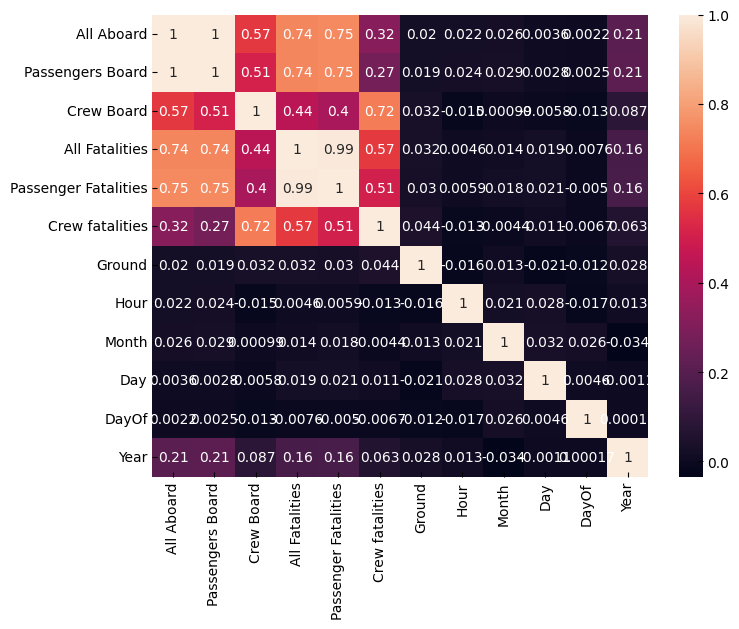

In [224]:
corr_df = df.corr(method='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()


There is a high correlation between the number of passengers and the total number of people on board, this would be explained because the majority of people on board are passengers, and it also has a medium correlation with the total number of fatalities, this would be explained because the greater the number of of people on board there is a greater probability of a greater number of fatalities.

#### Delete columbs which are not used

In [ ]:
df.drop(["cn_ln","Registration","Route","flight_no"],axis=1,inplace=True)

In [61]:
df.to_csv("Data.csv")

In [70]:
df=pd.read_csv("Data.csv")

In [73]:
df.dropna(subset=["All Fatalities", "All Aboard"], inplace=True)
df1 = df[df["All Fatalities"] > 0]
All_fat = df.groupby(by=["Year", "Country"])[
    "All Fatalities"].count().reset_index()
All_fat1 = df1.groupby(by=["Year", "Country"])[
    "All Fatalities"].count().reset_index()
All_fat2 = All_fat.merge(All_fat1, on="Year")


In [74]:
All_fat2

Year                 Country_x  All Fatalities_x  \
0      1908  United States of America                 1   
1      1909                    France                 1   
2      1912  United States of America                 1   
3      1913                    Canada                 1   
4      1913                    Canada                 1   
...     ...                       ...               ...   
89201  2021  United States of America                 1   
89202  2021  United States of America                 1   
89203  2021  United States of America                 1   
89204  2021  United States of America                 1   
89205  2021  United States of America                 1   

                      Country_y  All Fatalities_y  
0      United States of America                 1  
1                        France                 1  
2      United States of America                 1  
3                        Canada                 1  
4                       Germany                 1  
...                         ...               ...  
89201                   Nigeria                 1  
89202               Philippines                 1  
89203                    Russia                 1  
89204                     Sudan                 1  
89205  United States of America                 1  

[89206 rows x 5 columns]

## CONCLUSIONS

1. The most accidents occurred in the range of 8-20 hours and this has a relationship to the high number of fatalities that occurred in the same range, the highest number of accidents at 11(6.05%) and the highest number of fatalities at 14(6.06%).
2. The most accidentes occurred in the range of December to January and this has a not very clear relationship to the high number of fatalities that occurred in the same range, cause the most fatalities ocurred in the range of July to December, but the highest number of fatalities(9.78%) and number of accidents(9.90%) occurred in December.
3. The most accidents occurred in the range of Tuesday to Saturday and this has a relationship to the high number of fatalities that occurred in the same range, the highest number of accidents on Tuesday(15.19%) and the highest number of fatalities on Wednesday(15.48%).
4. The most accidents occurred in the range of first days of month and this has a relationship to the high number of fatalities that occurred in the same range, the highest number of accidents on 8th day of month(3.67%) and the highest number of fatalities on 3rd day of month(4.71%).
5. The most accidents occurred in the range of 1944-2003 year and this has a relationship to the high number of fatalities that occurred in the same range, the highest number of accidents in 1946(88,1.75%) and 1989(83,1.65%) and the highest number of fatalities in 1972(2.50%).
6. The ground fatalities has a defined trend over the years except 2001 due to attack on the Twin Towers.
7. The most fatalities(13.03%) and most accidents(20.16%) occurred in The United States of America, followed by Russia and Brazil respectively in both metrics.
8. The most fatalities(5.06%) and most accidents(7.90%) occurred by Aeroflot operator which is a Russian airline, it would explain why Russia is top 2 in accidents and fatalities; followed by some U.S.A operators which would explain why The United States had most fatalities and accidents.
9. The most fatalities and accidents occurred by Douglas airplane models like DC-3,C-47,DC-6B,DC-4, etc.
10. There is a high correlation between the number of passengers and the total number of people on board(100%), this would be explained because the majority of people on board are passengers, and it also has a medium correlation with the total number of fatalities(75%), this would be explained because the greater the number of of people on board there is a greater probability of a greater number of fatalities.


